In [ ]:
%pip install matplotlib numpy scipy ipympl manim -q


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

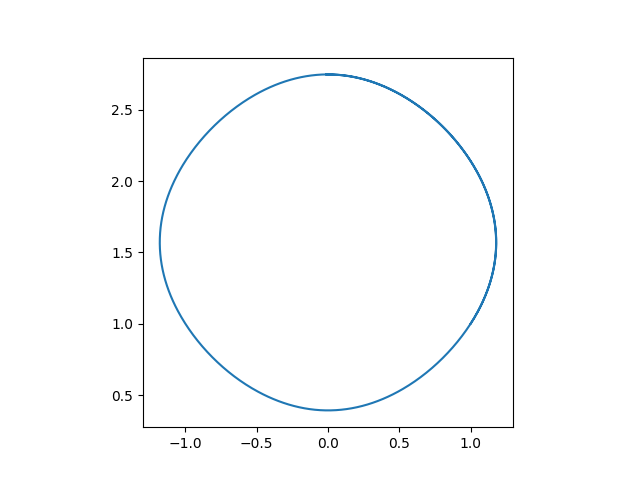

In [3]:
%matplotlib widget
def f(t, r):
    x, y = r
    fx = np.cos(y)
    fy = np.sin(x)
    return fx, fy

sol = solve_ivp(f, [0, 10], [1, 1], t_eval=np.linspace(0, 10, 1000))

x, y = sol.y

plt.plot(x, y)
plt.axis('scaled')
plt.show()

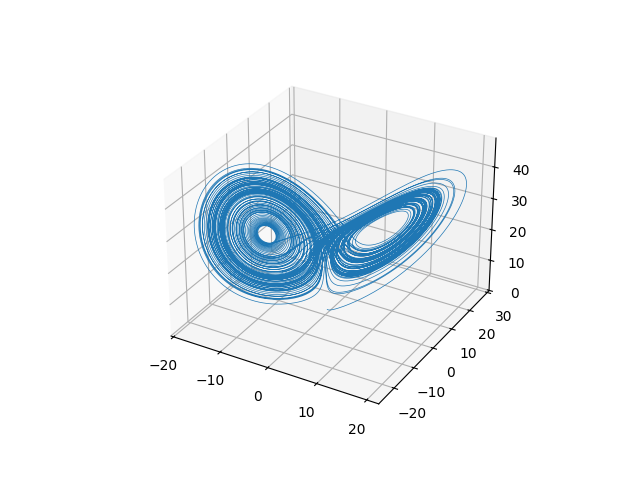

In [4]:
%matplotlib widget
def lorenz(t, state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dxdt = sigma*(y - x)
    dydt = x*rho - x*z - y
    dzdt = x*y - beta*z
    return np.array([dxdt, dydt, dzdt])

t = 100

state0 = [0., 1., 1.05]
t_span = [0, t]

sol = solve_ivp(lorenz, t_span, state0, t_eval=np.linspace(0, t, 1000000))
x, y, z = sol.y

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*sol.y, lw=0.5)
plt.show()

In [5]:
import manim as mn
from manim import *

config.media_width = '100%'
config.verbosity = 'WARNING'

In [6]:
%%manim -qm CircleScene

class CircleScene(Scene):
    def construct(self):
        circle = Circle(color=BLUE, fill_opacity=0.5)
        self.play(Create(circle))
        self.wait()

Manim Community v0.19.0

In [7]:
%%manim -qm ThreeDScene

class ThreeDScene(ThreeDScene):
    def lorenz(self):
        dxdt = sigma*(y - x)
        dydt = x*rho - x*z - y
        dzdt = x*y - beta*z

    def construct(self):
        curve1 = ParametricFunction(
            lambda u: (
                1.2 * np.cos(u),
                1.2 * np.sin(u),
                u * 0.05
            ),
            color=RED,
            t_range=(-3*TAU, 5*TAU, 0.01)
        ).set_shade_in_3d(True)

        # Set up axes
        axes = ThreeDAxes(
            x_range=(-50, 50, 5),
            y_range=(-50, 50, 5),
            z_range=(-0, 50, 5),
            x_length=16,
            y_length=16,
            z_length=8
        )
        axes.center()

        self.set_camera_orientation(
            theta=43 * DEGREES,  # Rotation around z-axis
            phi=76 * DEGREES,    # Rotation around y-axis
            gamma=1 * DEGREES    # Rotation around x-axis
        )

        self.move_camera(zoom=0.5)

        self.add(axes)

        self.play(Create(curve1))

        self.wait()

Manim Community v0.19.0

In [9]:
%%manim -qm Axes3DExample

class Axes3DExample(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()

        x_label = axes.get_x_axis_label(Tex("x"))
        y_label = axes.get_y_axis_label(Tex("y")).shift(UP * 1.8)

        # 3D variant of the Dot() object
        dot = Dot3D()

        # zoom out so we see the axes
        self.set_camera_orientation(zoom=0.5)

        self.play(FadeIn(axes), FadeIn(dot), FadeIn(x_label), FadeIn(y_label))

        self.wait(0.5)

        # animate the move of the camera to properly see the axes
        self.move_camera(phi=75 * DEGREES, theta=30 * DEGREES, zoom=1, run_time=1.5)

        # built-in updater which begins camera rotation
        self.begin_ambient_camera_rotation(rate=0.15)

        # one dot for each direction
        upDot = dot.copy().set_color(RED)
        rightDot = dot.copy().set_color(BLUE)
        outDot = dot.copy().set_color(GREEN)

        self.wait(1)

        self.play(
            upDot.animate.shift(UP),
            rightDot.animate.shift(RIGHT),
            outDot.animate.shift(OUT),
        )

        self.wait(2)

Manim Community v0.19.0

In [10]:
%%manim -qm WaveAnimation

class WaveAnimation(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes(
            x_range=[0,2*TAU,1],
            y_range=[-6,6,1],
            z_range=[-6,6,1],
            x_length=2*TAU,
            y_length=6,
            z_length=6,
        )

        labels = axes.get_axis_labels(
            Text("x-axis").scale(0.7), Text("y-axis").scale(0.45), Text("z-axis").scale(0.45)
        )
        self.add(axes, labels)

        # graph = axes.plot(lambda x: x**2, x_range=[-2,2,1], color=YELLOW)
        # rects = axes.get_riemann_rectangles(
        #     graph=graph, x_range=[-2, 2], dx=0.1, stroke_color=WHITE
        # )

        self.set_camera_orientation(
            theta=43 * DEGREES,  # Rotation around z-axis
            phi=76 * DEGREES,    # Rotation around y-axis
            gamma=1 * DEGREES    # Rotation around x-axis
        )

        curve1 = ParametricFunction(
            function=lambda u: (
                u * 0.50,
                1 * np.sin(u),
                0,
            ), 
            color=BLUE, 
            t_range=(-2*TAU, 2*TAU, 0.01) # (-5*TAU, 5*TAU, 0.01)
        ).set_shade_in_3d(True)

        curve2 = ParametricFunction(
            lambda u: (
                u * 0.50,
                0,
                1 * np.sin(u),
            ), 
            color=RED, 
            t_range=(-2*TAU, 2*TAU, 0.01) # t_range = (-5*TAU, 5*TAU, 0.01)
        ).set_shade_in_3d(True)

        area1 = axes.get_area(curve1, [-2*TAU, 2*TAU], color=BLUE, opacity=0.5)
        area2 = axes.get_area(curve2, [-2*TAU, 2*TAU], color=RED, opacity=0.5)

        # rects1 = axes.get_riemann_rectangles(
        #     graph=curve1, x_range=[0, 2*TAU], dx=0.1, stroke_color=BLUE
        # )
        # rects2 = axes.get_riemann_rectangles(
        #     graph=curve2, x_range=[0, 2*TAU], dx=0.1, stroke_color=RED
        # )

        # self.add(axes, graph)
        self.add(axes)
        self.wait()

        # The camera is auto set to phi = 0 and theta = -90
        # self.move_camera(phi=60 * DEGREES)
        self.wait()
        self.move_camera(theta=-30 * DEGREES)

        self.begin_ambient_camera_rotation(
            rate=PI / 10 , about='theta'
        ) # Rotates at a rate of radians per second
        # self.play(Create(rects), run_time=3)
        self.play(Create(curve1), Create(area1), Create(curve2), Create(area2), run_time=15)
        # self.play(Create(curve1), Create(curve2), run_time=15)
        # self.wait(duration=10)
        self.wait()

Manim Community v0.19.0